In [1]:
# import libraries
import torch
import torch.nn as nn
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# import dataset
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')


# convert from pandas dataframe to tensor
data = torch.tensor( iris[iris.columns[0:4]].values ).float()

# transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species=='setosa'] = 0 # don't need!
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

# Data Loader in Pytorch

- Utility that help to load data in Batch, Minibatch etc.

In [3]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data, 
    labels, 
    test_size=0.2, 
    random_state=42
)

train_data = torch.utils.data.TensorDataset(train_data, train_labels)
test_data = torch.utils.data.TensorDataset(test_data, test_labels)

In [4]:
from torch.utils.data import DataLoader

train_loader = DataLoader(
    train_data,
    shuffle=True,
    batch_size=12
)

test_loader = DataLoader(
    test_data,
    shuffle=True,
    batch_size=test_data.tensors[0].shape[0]
)

In [12]:
print('TRAINING DATA')
for batch,label in train_loader: # iterable
  print(batch)
  print()
  print(batch.shape)
  print(' ')
  print(label)
  print()
  print(label.shape)
  break

TRAINING DATA
tensor([[7.3000, 2.9000, 6.3000, 1.8000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [6.1000, 2.9000, 4.7000, 1.4000],
        [6.6000, 3.0000, 4.4000, 1.4000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.6000, 2.7000, 4.2000, 1.3000],
        [7.7000, 3.8000, 6.7000, 2.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [6.3000, 2.7000, 4.9000, 1.8000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [6.4000, 2.7000, 5.3000, 1.9000],
        [4.6000, 3.1000, 1.5000, 0.2000]])

torch.Size([12, 4])
 
tensor([2, 1, 1, 1, 0, 1, 2, 0, 2, 0, 2, 0])

torch.Size([12])


In [5]:
def createANewModel():

  # model architecture
  ANNiris = nn.Sequential(
      nn.Linear(4,64),   # input layer
      nn.ReLU(),         # activation unit
      nn.Linear(64,64),  # hidden layer
      nn.ReLU(),         # activation unit
      nn.Linear(64,3),   # output units
        )

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.01)

  return ANNiris,lossfun,optimizer

In [6]:

# train the model

# global parameter
numepochs = 500

def trainTheModel():

  # initialize accuracies as empties (not storing losses here)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for epochi in range(numepochs):


    # loop over training data batches
    batchAcc = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = ANNiris(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # compute training accuracy just for this batch
      batchAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )
    # end of batch loop...


    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # test accuracy
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    predlabels = torch.argmax( ANNiris(X),axis=1 )
    testAcc.append( 100*torch.mean((predlabels == y).float()).item() )

  # function output
  return trainAcc,testAcc

In [7]:
# create a model
ANNiris,lossfun,optimizer = createANewModel()

# train the model
trainAcc,testAcc = trainTheModel()

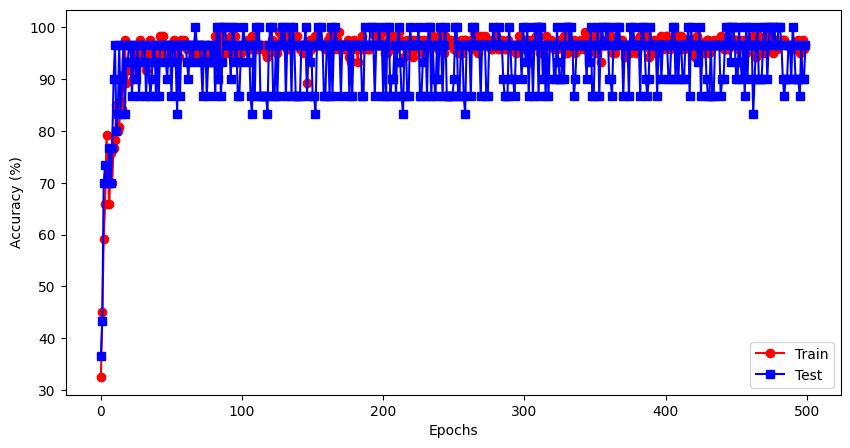

In [8]:
# plot the results
fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc,'ro-')
plt.plot(testAcc,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train','Test'])

# optional zoom-in to final epochs
# plt.xlim([300,500])
# plt.ylim([90,100.5])

plt.show()
     